In [60]:
import networkx as nx
import seaborn as sns

import numpy as np

%pylab inline

import powerlaw as pwl

Populating the interactive namespace from numpy and matplotlib


In [61]:
G = nx.read_gml('../log/graph.gml')

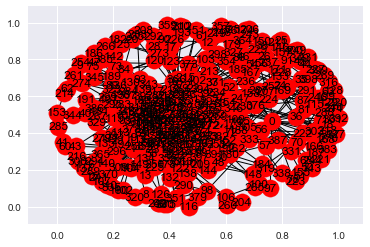

In [62]:
nx.draw_networkx(G)

In [92]:
degree = list(nx.degree(G).values())
degree = [x + 1 for x in degree]

59

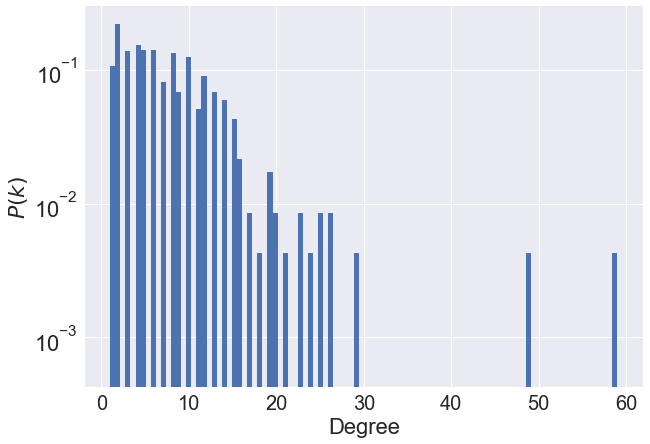

In [124]:
figure(figsize=(10,7))
hist(degree, bins=100, normed=True, log=True, histtype='stepfilled')

xticks(fontsize=20)
yticks(fontsize=22)
xlabel('Degree', fontsize=22)
ylabel('$P(k)$', fontsize=22)


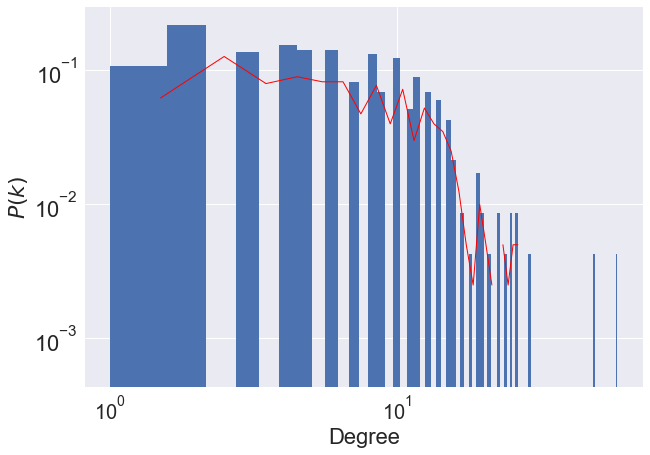

In [94]:
figure(figsize=(10,7))
hist(degree, bins=100, normed=True, log=True, histtype='stepfilled')

pwl.plot_pdf(degree, color='r', linear_bins=True, linewidth=1)

xticks(fontsize=20)
yticks(fontsize=22)
xlabel('Degree', fontsize=22)
ylabel('$P(k)$', fontsize=22)

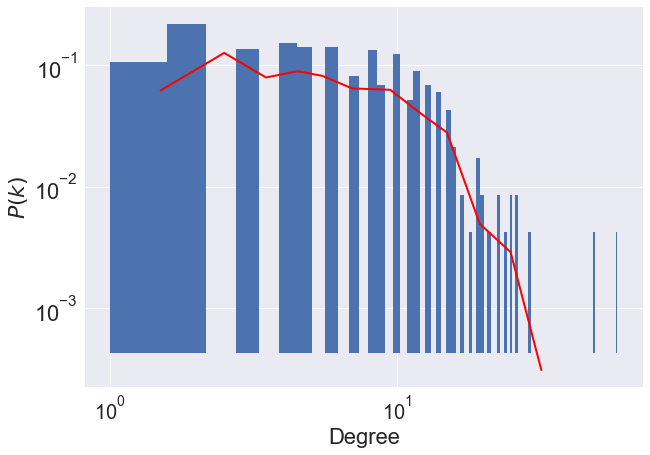

In [95]:
plt.figure(figsize=(10,7))
plt.hist(degree, bins=100, normed=True, log=True, histtype='stepfilled')

pwl.plot_pdf(degree, color='r', linear_bins=False, linewidth=2)

plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

In [96]:
fit_function = pwl.Fit(degree, verbose=False)

/usr/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [97]:
fit_function

In [98]:
fit_function.power_law

/usr/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [99]:
fit_function.power_law.alpha

5.1908927011187558

In [100]:
fit_function.power_law.sigma

0.45191558215968419

In [101]:
fit_function.power_law.xmin

12.0

In [102]:
fit_function_fixmin = pwl.Fit(degree, xmin=10)

/usr/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [103]:
fit_function_fixmin.xmin

10.0

In [104]:
fit_function_fixmin.power_law.alpha

/usr/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


4.4008082549403529

In [105]:
fit_function_fixmin.power_law.sigma

0.30177293422973767

In [106]:
fit_function.power_law.D

0.051922703316541474

In [107]:
fit_function_fixmin.power_law.D

0.13924278663692463

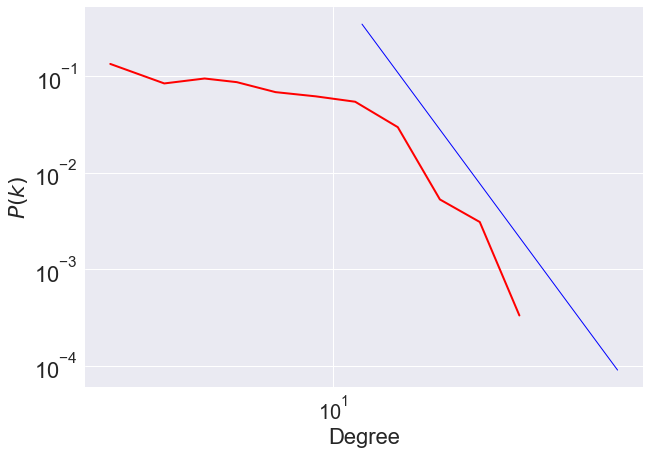

In [108]:
fig=plt.figure(figsize=(10,7))

#fig=pwl.plot_pdf(degree, color='r', linewidth=2)

fig=pwl.plot_pdf([x for x in degree if x>1], color='r', linewidth=2)

fit_function.power_law.plot_pdf(ax=fig, color='b', linestyle='-', linewidth=1)

plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

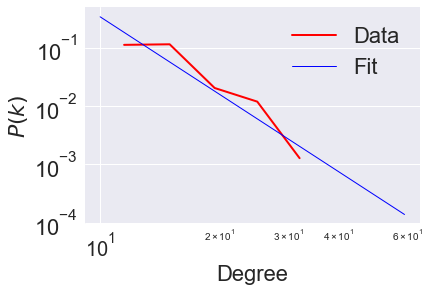

In [87]:
#### fig=plt.figure(figsize=(10,7))

fig=pwl.plot_pdf([x for x in degree if x>10], color='r', linewidth=2, label='Data')

fit_function_fixmin.power_law.plot_pdf(ax=fig, color='b', linestyle='-', linewidth=1, label='Fit')

fig.legend(fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

In [38]:
fit_function.supported_distributions

{'exponential': powerlaw.Exponential,
 'lognormal': powerlaw.Lognormal,
 'lognormal_positive': powerlaw.Lognormal_Positive,
 'power_law': powerlaw.Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law}

In [39]:
R,p = fit_function.distribution_compare('power_law', 'exponential', normalized_ratio=True)

/usr/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [40]:
R,p

(2.232947963868114, 0.025552376085955446)

In [42]:
R2,p2 = fit_function.distribution_compare('power_law', 'lognormal_positive', normalized_ratio=True)

/usr/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [43]:
R2,p2

(2.0186561976844417, 0.043522965637517716)

In [44]:
R3,p3 = fit_function.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)

Assuming nested distributions
/usr/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [45]:
R3,p3

(0.0046804488201590104, 0.99108059079579292)

In [46]:
R4,p4 = fit_function.distribution_compare('power_law', 'stretched_exponential', normalized_ratio=True)

/usr/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [47]:
R4,p4

(1.9155998749398309, 0.05541604550422094)

In [57]:
R,p = fit_function_fixmin.distribution_compare('power_law', 'exponential', normalized_ratio=True)

In [58]:
R,p

(1.5492612682381239, 0.12131892646017715)

In [59]:
R3, p3 = fit_function_fixmin.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)
R3, p3

Assuming nested distributions


(0.0004262329502752744, 0.99969984127806277)

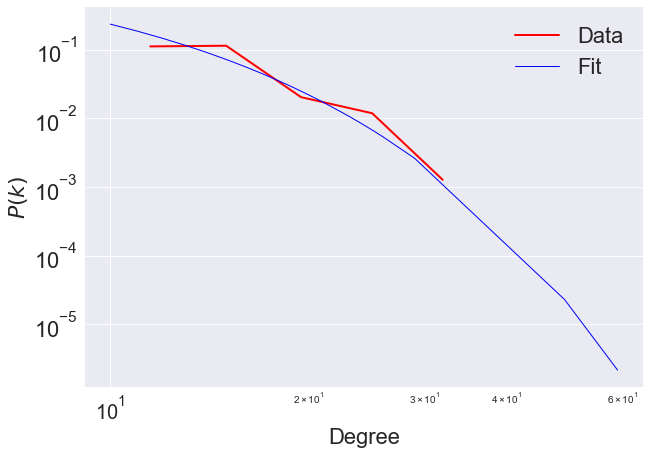

In [51]:
fig=plt.figure(figsize=(10,7))

fig=pwl.plot_pdf([x for x in degree if x>10], color='r', linewidth=2, label='Data')

fit_function_fixmin.exponential.plot_pdf(ax=fig, color='b', linestyle='-', linewidth=1, label='Fit')

fig.legend(fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

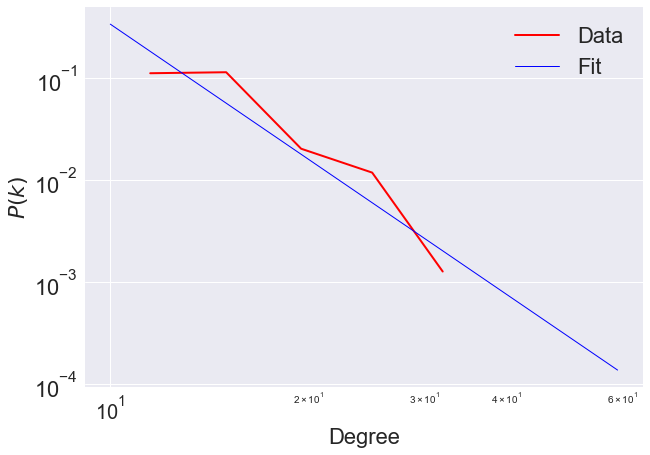

In [52]:
fig=plt.figure(figsize=(10,7))

fig=pwl.plot_pdf([x for x in degree if x>10], color='r', linewidth=2, label='Data')

fit_function_fixmin.truncated_power_law.plot_pdf(ax=fig, color='b', linestyle='-', linewidth=1, label='Fit')

fig.legend(fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

In [53]:
fit_function_fixmin.truncated_power_law.parameter1

4.40085642315894

In [54]:
fit_function_fixmin.truncated_power_law.parameter2

8.2627398359030192e-09